### Independent component analysis (ICA)


L'Analyse en Composantes Indépendantes (ICA) : Une Approche de Séparation de Sources dans le Traitement du Signal


L'Analyse en Composantes Indépendantes (ICA) est une technique puissante du domaine du traitement du signal et de l'apprentissage automatique, permettant la séparation de sources dans un mélange de signaux. Cette approche repose sur l'hypothèse que les signaux sources d'origine sont statistiquement indépendants les uns des autres. Dans cet article, nous explorerons l'algorithme ICA, ses étapes fondamentales, et son application dans la déconvolution de mélanges de signaux.


L'ICA commence par la collecte de données, généralement sous la forme d'un ensemble de signaux mélangés. Ces signaux peuvent représenter divers phénomènes, allant de l'audio aux images en passant par les données financières. Avant d'appliquer l'ICA, il est impératif de prétraiter ces données.

Le prétraitement comprend deux étapes essentielles : la centralisation et le blanchiment. La centralisation implique la soustraction de la moyenne de chaque signal, recentrant ainsi les données autour de zéro. Le blanchiment, quant à lui, vise à décorréler les signaux en transformant la matrice de covariance des données en une matrice diagonale. Cela facilite le calcul ultérieur.


Une fois les données prétraitées, l'algorithme ICA initialise une matrice de démixage (ou matrice de séparation). Cette matrice est alors itérativement mise à jour pour maximiser l'indépendance statistique des composantes estimées. Le processus implique le calcul de gradients et l'utilisation de techniques d'optimisation telles que la montée de gradient ou l'itération en point fixe.

Lorsque la matrice de démixage a convergé, elle est utilisée pour extraire les composantes indépendantes à partir des données prétraitées. Ces composantes représentent les sources d'origine, maintenant séparées des mélanges initiaux.

Selon l'application spécifique, des étapes de post-traitement telles que la mise à l'échelle ou la rotation des composantes indépendantes peuvent être nécessaires. Les résultats obtenus doivent ensuite être interprétés en fonction du contexte de la tâche.

La visualisation des composantes indépendantes extraites est essentielle pour évaluer la qualité de la séparation. Les performances peuvent être mesurées en utilisant des métriques spécifiques au domaine ou en comparant les résultats à une vérité terrain, si disponible. L'optimisation et l'affinage de l'implémentation peuvent être nécessaires pour obtenir les meilleurs résultats.

En conclusion, l'Analyse en Composantes Indépendantes est une technique puissante qui trouve des applications dans divers domaines, notamment la séparation de sources audio, la déconvolution d'images, et l'analyse de données financières. Sa compréhension et sa mise en œuvre, bien que complexes, peuvent offrir des solutions précieuses pour la séparation de mélanges de signaux dans le traitement du signal et l'apprentissage automatique.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:


def center_data(X):
    """Center the data by subtracting the mean of each column."""
    mean = np.mean(X, axis=0)
    return X - mean

def whitening(X):
    """Whiten the data to have a diagonal covariance matrix."""
    cov = np.cov(X, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(cov)
    D_inv_sqrt = np.diag(1.0 / np.sqrt(eigenvalues))
    whitened_X = np.dot(np.dot(eigenvectors, D_inv_sqrt), eigenvectors.T)
    return np.dot(X, whitened_X.T)

def fast_ica(X, max_iter=100, tol=1e-4):
    """Perform FastICA on the preprocessed data X."""
    n_samples, n_features = X.shape
    W = np.random.rand(n_features, n_features)  # Initialize the unmixing matrix

    for iteration in range(max_iter):
        prev_W = W.copy()
        
        # Compute the estimated sources (S)
        S = np.dot(X, W.T)
        
        # Compute the contrast function and its derivative
        G = np.tanh(S)
        G_prime = 1 - G**2
        
        # Update the unmixing matrix
        W += np.dot(X.T, G) / n_samples - np.diag(np.mean(G_prime, axis=0)) @ W
        
        # Orthogonalize the unmixing matrix using Gram-Schmidt
        W = np.linalg.qr(W)[0]
        
        # Check for convergence
        if iteration > 0 and np.allclose(W, prev_W, atol=tol):
            break

    # Estimated sources
    S_estimated = np.dot(X, W.T)
    return S_estimated, W


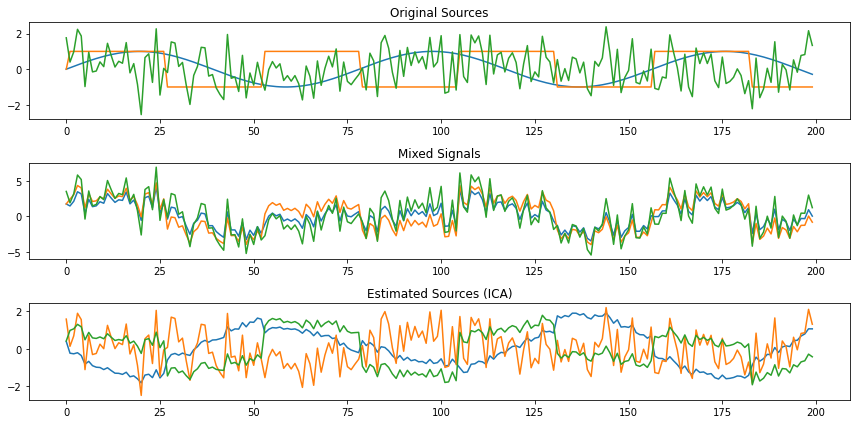

In [3]:

# Generate synthetic data (example)
np.random.seed(0)
n_samples = 200
time = np.linspace(0, 8, n_samples)
s1 = np.sin(2 * time)  # Signal 1: Sinusoidal
s2 = np.sign(np.sin(3 * time))  # Signal 2: Square wave
s3 = np.random.randn(n_samples)  # Signal 3: Gaussian noise
S = np.c_[s1, s2, s3]

# Mix the signals to create observed data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)

# Preprocess the data
X_centered = center_data(X)
X_whitened = whitening(X_centered)

# Apply FastICA to unmix the signals
S_estimated, W_estimated = fast_ica(X_whitened)

# Plot the original and estimated sources

plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.title("Original Sources")
plt.plot(S)
plt.subplot(3, 1, 2)
plt.title("Mixed Signals")
plt.plot(X)
plt.subplot(3, 1, 3)
plt.title("Estimated Sources (ICA)")
plt.plot(S_estimated)
plt.tight_layout()
plt.show()